In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import GridSearchCV
import category_encoders as ce
from sklearn.metrics import accuracy_score

In [410]:
X_df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/train_features.csv')
pd.set_option('display.max_columns', 100)
X_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [411]:
y_df = pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/train_labels.csv')
y_df.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [412]:
X_test_df= pd.read_csv('/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/test_features.csv')
X_test_df.head()

# Hold on to this one for later

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [413]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [415]:
#So date doesn't get dropped in next step

X_df['date_recorded'] = pd.to_datetime(X_df['date_recorded'])
X_test_df['date_recorded'] = pd.to_datetime(X_test_df['date_recorded'])

X_df['YearMonth'] = X_df['date_recorded'].map(lambda x: 100*x.year + x.month)
X_test_df['YearMonth'] = X_test_df['date_recorded'].map(lambda x: 100*x.year + x.month)

X_df['Year'] = X_df['date_recorded'].map(lambda x: x.year)
X_test_df['Year'] = X_test_df['date_recorded'].map(lambda x: x.year)

X_df['Month'] = X_df['date_recorded'].map(lambda x: x.month)
X_test_df['Month'] = X_test_df['date_recorded'].map(lambda x: x.month)

In [416]:
max_cardinality = 100

high_cardinality = [col for col in X_df.select_dtypes(exclude=np.number)
                   if X_df[col].nunique() > max_cardinality]

X_df = X_df.drop(columns=high_cardinality)
X_test_df = X_test_df.drop(columns=high_cardinality)

X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 35 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
gps_height               59400 non-null int64
longitude                59400 non-null float64
latitude                 59400 non-null float64
num_private              59400 non-null int64
basin                    59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null object
scheme_management        55523 non-null object
permit                   56344 non-null object
construction_year        59400 non-null int64
extraction_type          59400 non-null object
extraction_type_group    59400 non-null object
extraction_type_class    59400 non-null object
ma

In [423]:
X_df['water_quality'] = X_df['water_quality'].replace('unknown', 'unknown_water_quality')
oh_wq = pd.get_dummies(X_df['water_quality'])
X_df = X_df.drop(columns ='water_quality')
X_df = X_df.join(oh_wq)

X_test_df['water_quality'] = X_test_df['water_quality'].replace('unknown', 'unknown_water_quality')
t_oh_wq = pd.get_dummies(X_test_df['water_quality'])
X_test_df = X_test_df.drop(columns ='water_quality')
X_test_df = X_test_df.join(t_oh_wq)

In [424]:
X_df['quantity'] = X_df['quantity'].replace('unknown', 'unknown_quantity')
oh_wq = pd.get_dummies(X_df['quantity'])
X_df = X_df.drop(columns ='quantity')
X_df = X_df.join(oh_wq)

X_test_df['quantity'] = X_test_df['quantity'].replace('unknown', 'unknown_quantity')
t_oh_wq = pd.get_dummies(X_test_df['quantity'])
X_test_df = X_test_df.drop(columns ='quantity')
X_test_df = X_test_df.join(t_oh_wq)

In [425]:
X_df['waterpoint_type_group'] = X_df['waterpoint_type_group'].replace('other', 'other_waterpoint_type_group')
oh_wq = pd.get_dummies(X_df['waterpoint_type_group'])
X_df = X_df.drop(columns ='waterpoint_type_group')
X_df = X_df.join(oh_wq)

X_test_df['waterpoint_type_group'] = X_test_df['waterpoint_type_group'].replace('other', 'other_waterpoint_type_group')
t_oh_wq = pd.get_dummies(X_test_df['waterpoint_type_group'])
X_test_df = X_test_df.drop(columns ='waterpoint_type_group')
X_test_df = X_test_df.join(t_oh_wq)

In [426]:
X_df['source_type'] = X_df['source_type'].replace('unknown', 'unknown_source_type')
X_df['source_type'] = X_df['source_type'].replace('dam', 'dam_source_type')
oh_st = pd.get_dummies(X_df['source_type'])
X_df = X_df.drop(columns ='source_type')
X_df = X_df.join(oh_st)

X_test_df['source_type'] = X_test_df['source_type'].replace('unknown', 'unknown_source_type')
X_test_df['source_type'] = X_test_df['source_type'].replace('dam', 'dam_source_type')
t_oh_wq = pd.get_dummies(X_test_df['source_type'])
X_test_df = X_test_df.drop(columns ='source_type')
X_test_df = X_test_df.join(t_oh_wq)

In [427]:
#X_df['basin'].value_counts()
oh_b = pd.get_dummies(X_df['basin'])
X_df = X_df.drop(columns ='basin')
X_df = X_df.join(oh_b)

t_oh_b = pd.get_dummies(X_test_df['basin'])
X_test_df = X_test_df.drop(columns ='basin')
X_test_df = X_test_df.join(t_oh_b)

In [428]:
#X_df['public_meeting'].value_counts().nlargest(25)

oh_pm = pd.get_dummies(X_df['public_meeting'])
X_df = X_df.drop(columns ='public_meeting')
X_df = X_df.join(oh_pm)

t_oh_pm = pd.get_dummies(X_test_df['public_meeting'])
X_test_df = X_test_df.drop(columns ='public_meeting')
X_test_df = X_test_df.join(t_oh_pm)

In [429]:
#X_df['scheme_management'].value_counts().nlargest(25)

oh_sm = pd.get_dummies(X_df['scheme_management'])
X_df = X_df.drop(columns ='scheme_management')
X_df = X_df.join(oh_sm)

t_oh_sm = pd.get_dummies(X_test_df['scheme_management'])
X_test_df = X_test_df.drop(columns ='scheme_management')
X_test_df = X_test_df.join(t_oh_sm)

In [430]:
#X_df['permit'].value_counts().nlargest(25)

X_df['permit'] = X_df['permit'].map({True: 1, False: 0, np.nan: -1})
X_test_df['permit'] = X_test_df['permit'].map({True: 1, False: 0, np.nan: -1})
X_test_df['None'] = 0

#X_df.describe(include='all')

In [431]:
#X_df['recorded_by'].value_counts().nlargest(25)

oh_rb = pd.get_dummies(X_df['recorded_by'])
X_df = X_df.drop(columns ='recorded_by')
X_df = X_df.join(oh_rb)

t_oh_rb = pd.get_dummies(X_test_df['recorded_by'])
X_test_df = X_test_df.drop(columns ='recorded_by')
X_test_df = X_test_df.join(t_oh_rb)

In [432]:
#X_df['extraction_type'].value_counts().nlargest(25)

X_df['extraction_type'] = X_df['extraction_type'].replace('other', 'other_extraction_type')
oh_et = pd.get_dummies(X_df['extraction_type'])
X_df = X_df.drop(columns ='extraction_type')
X_df = X_df.join(oh_et)

X_test_df['extraction_type'] = X_test_df['extraction_type'].replace('other', 'other_extraction_type')
t_oh_et = pd.get_dummies(X_test_df['extraction_type'])
X_test_df = X_test_df.drop(columns ='extraction_type')
X_test_df = X_test_df.join(t_oh_et)

X_test_df['other - mkulima/shinyanga'] = 0

In [433]:
#X_df['management_group'].value_counts().nlargest(25)

X_df['management_group'] = X_df['management_group'].replace('other', 'other_management_group')
X_df['management_group'] = X_df['management_group'].replace('unknown', 'unknown_management_group')
oh_et = pd.get_dummies(X_df['management_group'])
X_df = X_df.drop(columns ='management_group')
X_df = X_df.join(oh_et)

X_test_df['management_group'] = X_test_df['management_group'].replace('other', 'other_management_group')
X_test_df['management_group'] = X_test_df['management_group'].replace('unknown', 'unknown_management_group')
t_oh_et = pd.get_dummies(X_test_df['management_group'])
X_test_df = X_test_df.drop(columns ='management_group')
X_test_df = X_test_df.join(t_oh_et)

In [434]:
#X_df['payment_type'].value_counts().nlargest(25)

X_df['payment_type'] = X_df['payment_type'].replace('other', 'other_payment_type')
X_df['payment_type'] = X_df['payment_type'].replace('unknown', 'unknown_payment_type')
oh_et = pd.get_dummies(X_df['payment_type'])
X_df = X_df.drop(columns ='payment_type')
X_df = X_df.join(oh_et)

X_test_df['payment_type'] = X_test_df['payment_type'].replace('other', 'other_payment_type')
X_test_df['payment_type'] = X_test_df['payment_type'].replace('unknown', 'unknown_payment_type')
t_oh_et = pd.get_dummies(X_test_df['payment_type'])
X_test_df = X_test_df.drop(columns ='payment_type')
X_test_df = X_test_df.join(t_oh_et)

In [435]:
#X_df['region'].unique()

oh_r = pd.get_dummies(X_df['region'])
X_df = X_df.drop(columns ='region')
X_df = X_df.join(oh_r)

t_oh_r = pd.get_dummies(X_test_df['region'])
X_test_df = X_test_df.drop(columns ='region')
X_test_df = X_test_df.join(t_oh_r)

In [436]:
X_df['extraction_type_group'] = X_df['extraction_type_group'].replace({'gravity':0, 'submersible':1, 'swn 80':2, 'nira/tanira':3, 'india mark ii':4,
       'other':5, 'mono':6, 'wind-powered':7, 'afridev':8, 'rope pump':9,
       'india mark iii':10, 'other handpump':11, 'other motorpump':12})

X_test_df['extraction_type_group'] = X_test_df['extraction_type_group'].replace({'gravity':0, 'submersible':1, 'swn 80':2, 'nira/tanira':3, 'india mark ii':4,
       'other':5, 'mono':6, 'wind-powered':7, 'afridev':8, 'rope pump':9,
       'india mark iii':10, 'other handpump':11, 'other motorpump':12})


In [437]:
X_df['extraction_type_class'] = X_df['extraction_type_class'].replace({'gravity':0, 'submersible':1, 'handpump':2, 'other':3, 'motorpump':4,
       'wind-powered':5, 'rope pump':6})

X_test_df['extraction_type_class'] = X_test_df['extraction_type_class'].replace({'gravity':0, 'submersible':1, 'handpump':2, 'other':3, 'motorpump':4,
       'wind-powered':5, 'rope pump':6})

In [438]:
X_df['management'] = X_df['management'].replace({'vwc':0, 'wug':1, 'other':2, 'private operator':3, 'water board':4, 'wua':5,
       'company':6, 'water authority':7, 'parastatal':8, 'unknown':9,
       'other - school':10, 'trust':11})

X_test_df['management'] = X_test_df['management'].replace({'vwc':0, 'wug':1, 'other':2, 'private operator':3, 'water board':4, 'wua':5,
       'company':6, 'water authority':7, 'parastatal':8, 'unknown':9,
       'other - school':10, 'trust':11})

In [439]:
X_df['payment'] = X_df['payment'].replace({'pay annually':0, 'never pay':1, 'pay per bucket':2, 'unknown':3,
       'pay when scheme fails':4, 'other':5, 'pay monthly':6})

X_test_df['payment'] = X_test_df['payment'].replace({'pay annually':0, 'never pay':1, 'pay per bucket':2, 'unknown':3,
       'pay when scheme fails':4, 'other':5, 'pay monthly':6})

In [440]:
X_df['quality_group'] = X_df['quality_group'].replace({'good':0, 'salty':1, 'milky':2, 'unknown':3, 
                                                       'fluoride':4, 'colored':5})

X_test_df['quality_group'] = X_test_df['quality_group'].replace({'good':0, 'salty':1, 'milky':2,
                                                                 'unknown':3, 'fluoride':4, 'colored':5})

In [441]:
X_df['quantity_group'] = X_df['quantity_group'].replace({'enough':0, 'insufficient':1, 
                                                         'dry':2, 'seasonal':3, 'unknown':4})

X_test_df['quantity_group'] = X_test_df['quantity_group'].replace({'enough':0, 'insufficient':1, 
                                                         'dry':2, 'seasonal':3, 'unknown':4})

In [442]:
X_df['source'] = X_df['source'].replace({'spring':0, 'rainwater harvesting':1, 'dam':2, 'machine dbh':3, 'other':4,
       'shallow well':5, 'river':6, 'hand dtw':7, 'lake':8, 'unknown':9})

X_test_df['source'] = X_test_df['source'].replace({'spring':0, 'rainwater harvesting':1, 'dam':2, 'machine dbh':3, 'other':4,
       'shallow well':5, 'river':6, 'hand dtw':7, 'lake':8, 'unknown':9})

In [443]:
X_df['source_class'] = X_df['source_class'].replace({'groundwater':0, 'surface':1, 'unknown':2})

X_test_df['source_class'] = X_test_df['source_class'].replace({'groundwater':0, 'surface':1, 'unknown':2})

In [444]:
X_df['waterpoint_type'] = X_df['waterpoint_type'].replace({'communal standpipe':0, 'communal standpipe multiple':1,
                                                           'hand pump':2,'other':3, 'improved spring':4, 
                                                           'cattle trough':5, 'dam':6})

X_test_df['waterpoint_type'] = X_test_df['waterpoint_type'].replace({'communal standpipe':0, 'communal standpipe multiple':1,
                                                           'hand pump':2,'other':3, 'improved spring':4, 
                                                           'cattle trough':5, 'dam':6})

In [445]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Columns: 124 entries, id to Tanga
dtypes: float64(3), int64(20), uint8(101)
memory usage: 16.1 MB


In [103]:
X_test_df.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,permit,construction_year,YearMonth,Year,Month,coloured,fluoride,fluoride abandoned,milky,salty,salty abandoned,soft,unknown_water_quality,dry,enough,insufficient,seasonal,unknown_quantity,cattle trough,communal standpipe,dam,hand pump,improved spring,other_waterpoint_type_group,borehole,dam_source_type,other,rainwater harvesting,river/lake,shallow well,spring,Internal,Lake Nyasa,Lake Rukwa,Lake Tanganyika,Lake Victoria,Pangani,Rufiji,Ruvuma / Southern Coast,Wami / Ruvu,False,True,Company,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority,None,GeoData Consultants Ltd,afridev,cemo,climax,gravity,india mark ii,india mark iii,ksb,mono,nira/tanira,other - play pump,other - rope pump,other - swn 81,other_extraction_type,submersible,swn 80,walimi,windmill
count,14358.000000,14358.0000,14358.000000,1.435800e+04,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.0,14358.0,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000,14358.000000
mean,324.219996,653.6363,34.082414,-5.697584e+00,0.408971,15.156359,5.713052,187.055439,0.611436,1298.251985,201194.949018,2011.905349,4.414125,0.009124,0.002995,0.000139,0.013094,0.084691,0.005572,0.852277,0.032108,0.105725,0.556972,0.256233,0.068394,0.012676,0.002298,0.575289,0.000070,0.300251,0.012119,0.109974,0.204903,0.012049,0.004457,0.035869,0.172656,0.293286,0.276779,0.118331,0.081209,0.041789,0.110879,0.176557,0.149951,0.137066,0.075707,0.108511,0.088104,0.857222,0.019432,0.015949,0.027998,0.017760,0.001811,0.001393,0.613386,0.045550,0.087408,0.047639,0.056275,0.0,1.0,0.030018,0.001254,0.000557,0.429586,0.043182,0.002438,0.025770,0.051609,0.139783,0.001114,0.008218,0.003831,0.113595,0.083299,0.062474,0.000836,0.002438
std,2533.367778,688.2721,6.564449,2.947444e+00,8.231859,17.387588,9.794304,476.065978,0.574419,952.551852,95.892110,0.967263,3.048488,0.095085,0.054645,0.011802,0.113680,0.278432,0.074439,0.354837,0.176292,0.307496,0.496761,0.436567,0.252429,0.111875,0.047888,0.494316,0.008346,0.458383,0.109420,0.312868,0.403645,0.109109,0.066617,0.185969,0.377963,0.455284,0.447422,0.323011,0.273165,0.200113,0.313993,0.381306,0.357036,0.343929,0.264538,0.311035,0.283456,0.349858,0.138041,0.125284,0.164974,0.132083,0.042517,0.037298,0.486991,0.208513,0.282441,0.213009,0.230461,0.0,0.0,0.170643,0.035386,0.023599,0.495034,0.203273,0.049314,0.158453,0.221244,0.346774,0.033365,0.090285,0.061775,0.317330,0.276343,0.242023,0.028899,0.049314
min,0.000000,-57.0000,0.000000,-1.156459e+01,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,200103.000000,2001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000

In [446]:
X = X_df.select_dtypes('number')
X = X.drop(columns='id')
X = scale(X)

X_test_sc = X_test_df.select_dtypes('number')
X_test_sc = X_test_sc.drop(columns='id')
X_test_sc = scale(X_test_sc)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 123), (14850, 123), (44550, 1), (14850, 1), (14358, 123))

In [451]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,logreg.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train accuracy score: 0.7305723905723905
Test accuracy score: 0.726936026936027


In [469]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc_b = RFC()

rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:', accuracy_score(y_test,rfc_b.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Train accuracy score: 0.9802244668911335
Test accuracy score: 0.7908417508417508


In [466]:
#X = X_df.select_dtypes('number')
X = X_df.drop(columns=['id'])
X = scale(X)

y = y_df.drop(columns='id')
y = y.replace({'functional':0, 'non functional':2,'functional needs repair':1 })

X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

In [468]:
from sklearn.linear_model import Ridge
import numpy as np

ridge = Ridge()

ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_train)
best_preds = np.asarray([np.argmax(line) for line in y_pred])
yp_test = ridge.predict(X_test)
test_preds = np.asarray([np.argmax(line) for line in yp_test])
print('Train accuracy score:',accuracy_score(y_train,best_preds))
print('Test accuracy score:',accuracy_score(y_test,test_preds))

Train accuracy score: 0.542334455667789
Test accuracy score: 0.5453198653198653


In [470]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)
print('Train accuracy score:',accuracy_score(y_train,y_pred))
print('Test accuracy score:',accuracy_score(y_test,knn.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


Train accuracy score: 0.8352413019079685
Test accuracy score: 0.7661279461279461


In [152]:
y_pred = rfc_b.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass9 = ids.join(y_pred_df)

pass9.rename(columns={0:'status_group'}, 
                 inplace=True)

pass9.set_index('id')

pass9['status_group'] = pass9['status_group'].replace({0:'functional', 2:'non functional',1:'functional needs repair'})

In [153]:
pass9.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass9.csv',index=False)

In [167]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

pipe = make_pipeline( 
    SelectKBest(mutual_info_classif), 
    RFC()
)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [10,25,50,75,93], 
    'randomforestclassifier__class_weight': [None,'balanced']
}

gs = GridSearchCV(pipe,param_grid=param_grid, cv=3,
                 scoring='accuracy')

gs.fit(X_train,y_train)

pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training sco

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__class_weight,param_selectkbest__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
8,21.589864,0.547601,0.044159,0.000170,balanced,75,{'randomforestclassifier__class_weight': 'bala...,0.789307,0.785993,0.785440,0.786914,0.001708,1,0.978619,0.978182,0.979294,0.978698,0.000457
9,21.709484,0.239874,0.050954,0.003908,balanced,93,{'randomforestclassifier__class_weight': 'bala...,0.781698,0.784310,0.791501,0.785836,0.004145,2,0.977912,0.978822,0.979462,0.978732,0.000636
3,21.471990,0.078704,0.043705,0.001568,None,75,"{'randomforestclassifier__class_weight': None,...",0.784863,0.787744,0.783285,0.785297,0.001846,3,0.979225,0.980067,0.980001,0.979764,0.000382
4,21.593454,0.169838,0.047085,0.000461,None,93,"{'randomforestclassifier__class_weight': None,...",0.787556,0.784108,0.781669,0.784444,0.002415,4,0.980134,0.978788,0.979630,0.979517,0.000555
2,21.506942,0.114272,0.036569,0.000845,None,50,"{'randomforestclassifier__class_weight': None,...",0.782708,0.783232,0.785036,0.783659,0.000997,5,0.977373,0.977811,0.980236,0.978474,0.001259
7,21.557383,0.136466,0.038287,0.000957,balanced,50,{'randomforestclassifier__class_weight': 'bala...,0.780284,0.783636,0.784565,0.782828,0.001839,6,0.976430,0.977643,0.979092,0.977722,0.001088
6,21.357264,0.092502,0.032202,0.000673,balanced,25,{'randomforestclassifier__class_weight': 'bala...,0.782035,0.778855,0.782814,0.781235,0.001712,7,0.975218,0.974343,0.974412,0.974658,0.000397
1,21.851390,0.246516,0.032351,0.000859,None,25,"{'randomforestclassifier__class_weight': None,...",0.780890,0.776364,0.783756,0.780337,0.003043,8,0.978181,0.976970,0.976869,0.977340,0.000596
0,21.750528,0.156334,0.030361,0.001036,None,10,"{'randomforestclassifier__class_weight': None,...",0.764730,0.768215,0.768941,0.767295,0.001838,9,0.973568,0.973569,0.970742,0.972626,0.001333
5,21.572419,0.261180,0.030176,0.000348,balanced,10,{'randomforestclassifier__class_weight': 'bala...,0.761969,0.758451,0.766112,0.762177,0.003131,10,0.967743,0.965926,0.967745,0.967138,0.000857


In [168]:
print('Best score:',gs.best_score_)
print('Parameters for best score:', gs.best_params_)

Best score: 0.7869135802469136
Parameters for best score: {'randomforestclassifier__class_weight': 'balanced', 'selectkbest__k': 75}


In [169]:
test_score = gs.score(X_test, y_test)
print('Test Score:', test_score)

Test Score: 0.7931313131313131


In [171]:
# Which features were selected?
X_names = X_df.select_dtypes('number')
X_names = X_names.drop(columns='id')

selector = gs.best_estimator_.named_steps['selectkbest']
all_names = X_names.columns
selected_mask = selector.get_support()
selected_names = all_names[selected_mask]
unselected_names = all_names[~selected_mask]

print('Features selected:')
for name in selected_names:
    print(name)

print()
print('Features not selected:')
for name in unselected_names:
    print(name)

Features selected:
amount_tsh
gps_height
longitude
latitude
num_private
region_code
district_code
population
permit
construction_year
YearMonth
Month
fluoride
fluoride abandoned
milky
salty abandoned
soft
unknown_water_quality
dry
enough
insufficient
unknown_quantity
communal standpipe
dam
hand pump
improved spring
other_waterpoint_type_group
borehole
dam_source_type
rainwater harvesting
river/lake
shallow well
spring
Lake Nyasa
Lake Tanganyika
Lake Victoria
Pangani
Ruvuma / Southern Coast
Wami / Ruvu
False
True
Company
Parastatal
Private operator
VWC
WUA
WUG
Water Board
GeoData Consultants Ltd
climax
gravity
india mark ii
india mark iii
ksb
mono
nira/tanira
other - mkulima/shinyanga
other - swn 81
other_extraction_type
submersible
swn 80
walimi
windmill
commercial
other_management_group
parastatal
unknown_management_group
user-group
annually
monthly
never pay
on failure
other_payment_type
per bucket
unknown_payment_type

Features not selected:
Year
coloured
salty
seasonal
cattle troug

In [180]:
X = X_df.select_dtypes('number')
X = X.drop(columns=['id','Year','coloured','salty','seasonal','cattle trough',
                          'other','Internal','Lake Rukwa','Rufiji','None','Other',
                          'SWC','Trust','Water authority','afridev','cemo',
                          'other - play pump','other - rope pump'])
X = scale(X)

X_test_sc = X_test_df.select_dtypes('number')
X_test_sc = X_test_sc.drop(columns=['id','Year','coloured','salty','seasonal','cattle trough',
                          'other','Internal','Lake Rukwa','Rufiji','None','Other',
                          'SWC','Trust','Water authority','afridev','cemo',
                          'other - play pump','other - rope pump'])
X_test_sc = scale(X_test_sc)

X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 75), (14850, 75), (44550, 1), (14850, 1), (14358, 75))

In [453]:
rfc_b = RFC(class_weight='balanced')

rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,rfc_b.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9791694725028058
0.7927272727272727


In [174]:
y_pred = rfc_b.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass10 = ids.join(y_pred_df)

pass10.rename(columns={0:'status_group'}, 
                 inplace=True)

pass10.set_index('id')

pass10['status_group'] = pass10['status_group'].replace({0:'functional', 2:'non functional',1:'functional needs repair'})

In [175]:
pass10.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass10.csv',index=False)

#Got a .752 with this one

In [245]:
X = X_df.select_dtypes('number')
X = X.drop(columns=['id'])
X = scale(X)

X_test_sc = X_test_df.select_dtypes('number')
X_test_sc = X_test_sc.drop(columns=['id'])
X_test_sc = scale(X_test_sc)

y = y_df.drop(columns='id')
y = y.replace({'functional':0, 'non functional':2,'functional needs repair':1 })

X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 123), (14850, 123), (44550, 1), (14850, 1), (14358, 123))

In [183]:
pipe = make_pipeline( 
    SelectKBest(mutual_info_classif), 
    RFC()
)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'selectkbest__k': [65,75,85,93], 
    'randomforestclassifier__class_weight': [None,'balanced']
}

gs = GridSearchCV(pipe,param_grid=param_grid, cv=10,
                 scoring='accuracy')

gs.fit(X_train,y_train)

pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:250: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__class_weight,param_selectkbest__k,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
6,31.963044,0.211277,0.024081,0.000794,balanced,85,{'randomforestclassifier__class_weight': 'bala...,0.795602,0.793986,0.781194,0.802245,0.789450,0.792368,0.797261,0.795689,0.790301,0.786484,0.792458,0.005637,1,0.979572,0.978251,0.978126,0.978601,0.978775,0.978576,0.979399,0.979674,0.977704,0.979399,0.978808,0.000642
1,32.510118,1.243325,0.020827,0.000696,None,75,"{'randomforestclassifier__class_weight': None,...",0.795154,0.794434,0.785907,0.804040,0.787430,0.791246,0.790076,0.798608,0.793220,0.783565,0.792368,0.005814,2,0.980445,0.980022,0.979922,0.980197,0.979199,0.980197,0.980447,0.980347,0.980347,0.980322,0.980145,0.000355
2,135.886639,229.891040,0.030503,0.017975,None,85,"{'randomforestclassifier__class_weight': None,...",0.797622,0.793537,0.783214,0.801122,0.790123,0.790572,0.794342,0.794342,0.788505,0.789403,0.792278,0.004787,3,0.980969,0.979099,0.979872,0.979524,0.979224,0.980022,0.979300,0.979923,0.979674,0.979674,0.979728,0.000507
3,32.728720,0.761155,0.024644,0.001245,None,93,"{'randomforestclassifier__class_weight': None,...",0.795378,0.795108,0.782765,0.798878,0.786308,0.790572,0.789852,0.793444,0.799731,0.790525,0.792256,0.005061,4,0.979473,0.979648,0.980471,0.978975,0.980097,0.979474,0.981669,0.980721,0.979898,0.980422,0.980085,0.000734
0,33.068248,1.089983,0.019170,0.000611,None,65,"{'randomforestclassifier__class_weight': None,...",0.789769,0.791517,0.787253,0.798653,0.786532,0.797082,0.795016,0.792995,0.793444,0.787831,0.792009,0.003966,5,0.980021,0.980246,0.979423,0.979199,0.979125,0.980397,0.979075,0.980173,0.979774,0.979674,0.979711,0.000465
7,32.611637,2.467859,0.023154,0.001270,balanced,93,{'randomforestclassifier__class_weight': 'bala...,0.796724,0.795108,0.790395,0.802020,0.782043,0.786981,0.795240,0.784912,0.795914,0.789852,0.791919,0.005830,6,0.979173,0.978675,0.978949,0.979150,0.978676,0.979598,0.978327,0.978826,0.979100,0.978601,0.978908,0.000345
4,32.016785,0.194891,0.022085,0.000949,balanced,65,{'randomforestclassifier__class_weight': 'bala...,0.792461,0.788824,0.786355,0.799327,0.783389,0.786981,0.795465,0.797710,0.791423,0.789178,0.791111,0.004901,7,0.978101,0.979174,0.978825,0.977329,0.977952,0.978576,0.977753,0.977304,0.978103,0.978502,0.978162,0.000583
5,31.658301,0.127878,0.022852,0.001023,balanced,75,{'randomforestclassifier__class_weight': 'bala...,0.788198,0.789273,0.784336,0.799327,0.786756,0.785185,0.790750,0.797485,0.794118,0.789178,0.790460,0.004782,8,0.978874,0.978750,0.979498,0.977553,0.977478,0.978501,0.979898,0.978676,0.979300,0.979599,0.978813,0.000774


In [180]:
print('Best score:',gs.best_score_)
print('Parameters for best score:', gs.best_params_)

Best score: 0.7861952861952862
Parameters for best score: {'randomforestclassifier__class_weight': None, 'selectkbest__k': 75}


In [181]:
test_score = gs.score(X_test, y_test)
print('Test Score:', test_score)

Test Score: 0.7901010101010101


In [20]:
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier

In [365]:
features = X_df_new.drop(columns='id')
pd.set_option('display.max_row', 150)
pd.DataFrame(features.columns)

#f74,f82,f64,f65,f73
#'SWC','Trust','cemo','climax','other - play pump'

#f24,f43,f35,f83,f98
#'fluoride abandoned','other','cattle trough','walimi','Dar es Salaam'

##f80,f76,f75,f70
#'india mark iii','other - rope pump','other - swn 81','windmill'


,0
0,amount_tsh
1,gps_height
2,longitude
3,latitude
4,num_private
5,region_code
6,district_code
7,population
8,permit
9,construction_year


In [386]:
X = X_df.select_dtypes('number')
X = X.drop(columns=['id'])
X = scale(X)

X_test_sc = X_test_df.select_dtypes('number')
X_test_sc = X_test_sc.drop(columns=['id'])
X_test_sc = scale(X_test_sc)

y = y_df.drop(columns='id')
y = y.replace({'functional':0, 'non functional':2,'functional needs repair':1 })

X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, test_size=0.25, random_state=42, shuffle=True)

X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_test_sc.shape

((44550, 123), (14850, 123), (44550, 1), (14850, 1), (14358, 123))

In [471]:
xg_train = xgb.DMatrix(X_train, label=y_train)
xg_test = xgb.DMatrix(X_test, label=y_test)

In [472]:
xg_train.save_binary('train.buffer')
xg_test.save_binary('train.buffer')

In [481]:
# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softmax'
# param['booster'] = 'dart'
# param
param['eta'] = .3
# param['n_estimators'] = 100
param['max_depth'] = 5000
param['silent'] = 1
param['nthread'] = 10
param['num_class'] = 3
# param['max_delta_step'] = 100
param['subsample'] = .75
param['lambda'] = 5
param['alpha'] = .1
#param['gamma'] = 0
param['colsample_bytree'] = .55
param['colsample_bylevel'] = .8
param['min_child_weight'] = .2
param['scale_pos_weight'] = .2


watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 30
bst = xgb.train(param, xg_train, num_round, watchlist)

[0]	train-merror:0.181481	test-merror:0.229697
[1]	train-merror:0.150954	test-merror:0.214545
[2]	train-merror:0.134725	test-merror:0.205791
[3]	train-merror:0.123883	test-merror:0.200067
[4]	train-merror:0.119641	test-merror:0.198316
[5]	train-merror:0.116117	test-merror:0.19798
[6]	train-merror:0.10936	test-merror:0.196902
[7]	train-merror:0.102985	test-merror:0.195152
[8]	train-merror:0.096364	test-merror:0.19367
[9]	train-merror:0.090123	test-merror:0.193266
[10]	train-merror:0.085028	test-merror:0.191717
[11]	train-merror:0.079484	test-merror:0.191044
[12]	train-merror:0.074007	test-merror:0.189024
[13]	train-merror:0.070976	test-merror:0.190438
[14]	train-merror:0.067767	test-merror:0.189428
[15]	train-merror:0.065051	test-merror:0.189158
[16]	train-merror:0.060584	test-merror:0.189966
[17]	train-merror:0.057015	test-merror:0.189899
[18]	train-merror:0.053266	test-merror:0.189562
[19]	train-merror:0.049652	test-merror:0.190707
[20]	train-merror:0.04642	test-merror:0.189495
[21]	t

In [482]:
# get prediction
y_pred1 = bst.predict(xg_train)
y_pred2 = bst.predict(xg_test)
print('Train accuracy score:',accuracy_score(y_train,y_pred1))
print('Test accuracy score:',accuracy_score(y_test,bst.predict(xg_test)))



Train accuracy score: 0.9726374859708193
Test accuracy score: 0.8086868686868687


In [383]:
dtest = xgb.DMatrix(X_test_sc)

y_pred = bst.predict(dtest)

y_pred

array([2., 0., 0., ..., 0., 0., 2.], dtype=float32)

In [177]:
# import numpy as np
# best_preds = np.asarray([np.argmax(line) for line in y_pred])

# best_preds

array([2, 2, 0, ..., 0, 0, 2])

In [384]:
y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass11 = ids.join(y_pred_df)

pass11.rename(columns={0:'status_group'}, 
                 inplace=True)

pass11.set_index('id')

pass11['status_group'] = pass11['status_group'].replace({0:'functional', 2:'non functional',1:'functional needs repair'})

In [385]:
pass11.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass11.csv',index=False)


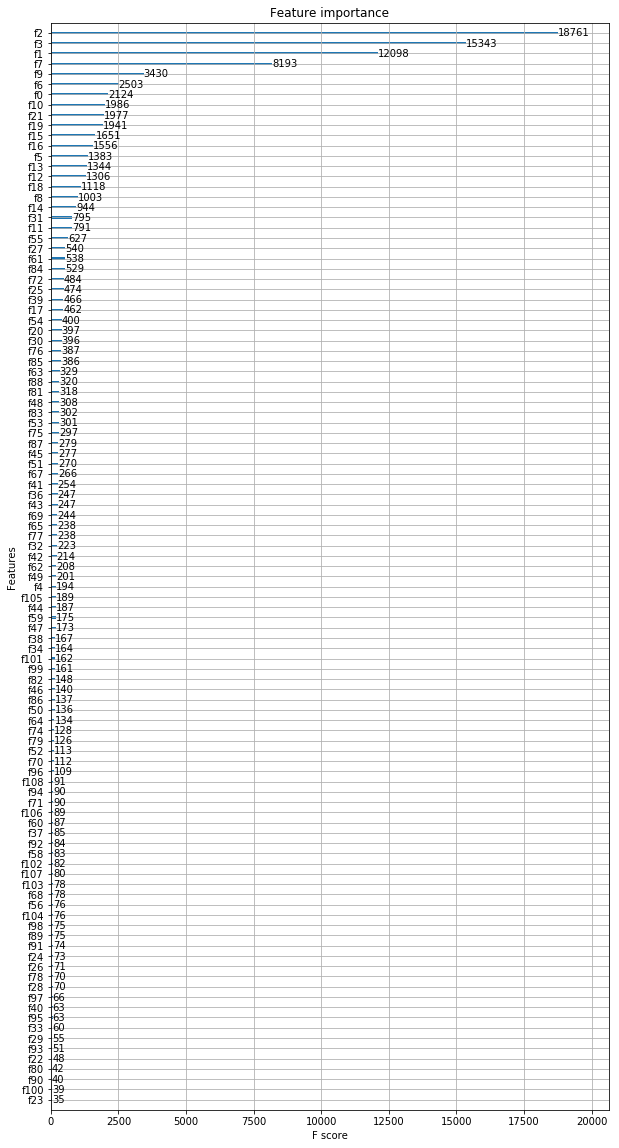

In [378]:
import matplotlib.pyplot as plt

ax = xgb.plot_importance(bst)
fig = ax.figure
fig.set_size_inches(10, 20);

In [328]:
#f80,f76,f75,f70

['f0',
 'f1',
 'f2',
 'f3',
 'f4',
 'f5',
 'f6',
 'f7',
 'f8',
 'f9',
 'f10',
 'f11',
 'f12',
 'f13',
 'f14',
 'f15',
 'f16',
 'f17',
 'f18',
 'f19',
 'f20',
 'f21',
 'f22',
 'f23',
 'f24',
 'f25',
 'f26',
 'f27',
 'f28',
 'f29',
 'f30',
 'f31',
 'f32',
 'f33',
 'f34',
 'f35',
 'f36',
 'f37',
 'f38',
 'f39',
 'f40',
 'f41',
 'f42',
 'f43',
 'f44',
 'f45',
 'f46',
 'f47',
 'f48',
 'f49',
 'f50',
 'f51',
 'f52',
 'f53',
 'f54',
 'f55',
 'f56',
 'f57',
 'f58',
 'f59',
 'f60',
 'f61',
 'f62',
 'f63',
 'f64',
 'f65',
 'f66',
 'f67',
 'f68',
 'f69',
 'f70',
 'f71',
 'f72',
 'f73',
 'f74',
 'f75',
 'f76',
 'f77',
 'f78',
 'f79',
 'f80',
 'f81',
 'f82',
 'f83',
 'f84',
 'f85',
 'f86',
 'f87',
 'f88',
 'f89',
 'f90',
 'f91',
 'f92',
 'f93',
 'f94',
 'f95',
 'f96',
 'f97',
 'f98',
 'f99',
 'f100',
 'f101',
 'f102',
 'f103',
 'f104',
 'f105',
 'f106',
 'f107',
 'f108',
 'f109',
 'f110',
 'f111',
 'f112',
 'f113',
 'f114',
 'f115',
 'f116',
 'f117',
 'f118',
 'f119',
 'f120',
 'f121',
 'f122']

In [407]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc_b = RFC()

rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,rfc_b.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.9798428731762066
0.791986531986532


In [406]:
rfc_b = RFC(class_weight='balanced')

rfc_b.fit(X_train,y_train)
y_pred = rfc_b.predict(X_train)
print(accuracy_score(y_train,y_pred))
print(accuracy_score(y_test,rfc_b.predict(X_test)))

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.978047138047138
0.7907070707070707


In [408]:
y_pred = rfc_b.predict(X_test_sc)

y_pred_df = pd.DataFrame(y_pred)

ids = pd.DataFrame(X_test_df['id'])

pass10 = ids.join(y_pred_df)

pass10.rename(columns={0:'status_group'}, 
                 inplace=True)

pass10.set_index('id')

pass10['status_group'] = pass10['status_group'].replace({0:'functional', 2:'non functional',1:'functional needs repair'})

In [409]:
pass10.to_csv(path_or_buf='/Users/ksmith/Documents/Code/DS1/Unit2_Project/DS_Unit2_Project/pass10.csv',index=False)
